In [1]:
import pandas as pd
import numpy as np

# load data

In [2]:
df_ko = pd.read_csv(r'resources\KO_deg_rp.csv')
df_ko

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,gene_symbol,radial_position
0,ENSMUSG00000051951.5,4596.51600,-0.034803,0.076375,0.455683,0.648618,0.819599,ENSMUSG00000051951,Xkr4,0.816454
1,ENSMUSG00000102331.1,1054.41910,-0.064543,0.091055,0.708838,0.478425,0.702964,ENSMUSG00000102331,Gm19938,0.816454
2,ENSMUSG00000025902.13,137.86269,0.148995,0.234180,-0.636238,0.524621,0.739653,ENSMUSG00000025902,Sox17,0.816454
3,ENSMUSG00000033845.13,1123.31020,0.014854,0.032770,-0.453284,0.650344,0.820574,ENSMUSG00000033845,Mrpl15,0.816454
4,ENSMUSG00000025903.14,780.72270,0.097769,0.071962,-1.358608,0.174271,0.387185,ENSMUSG00000025903,Lypla1,0.816454
...,...,...,...,...,...,...,...,...,...,...
12995,ENSMUSG00000087201.1,246.72847,0.031221,0.140724,-0.221858,0.824424,0.919110,ENSMUSG00000087201,Gm15261,0.813251
12996,ENSMUSG00000031352.10,880.62115,0.080394,0.084533,-0.951033,0.341588,0.580268,ENSMUSG00000031352,Hccs,0.813251
12997,ENSMUSG00000087159.7,186.38847,0.065399,0.171091,-0.382245,0.702279,0.854276,ENSMUSG00000087159,Gm15246,0.813251
12998,ENSMUSG00000035299.16,1022.19720,0.982708,0.572896,-1.715334,0.086284,0.241777,ENSMUSG00000035299,Mid1,0.797202


In [3]:
df_mm2 = pd.read_csv(r'resources\MM2_deg_with_rp.csv')
df_mm2

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,gene_symbol,radial_position
0,ENSMUSG00000051951.5,4090.12180,0.053989,0.041385,-1.304546,0.192047,0.472019,ENSMUSG00000051951,Xkr4,0.816454
1,ENSMUSG00000102331.1,954.11676,0.116306,0.084319,-1.379358,0.167784,0.436185,ENSMUSG00000102331,Gm19938,0.816454
2,ENSMUSG00000025902.13,126.70242,-0.193505,0.154297,1.254112,0.209801,0.498010,ENSMUSG00000025902,Sox17,0.816454
3,ENSMUSG00000033845.13,955.50330,-0.057657,0.038656,1.491560,0.135814,0.384387,ENSMUSG00000033845,Mrpl15,0.816454
4,ENSMUSG00000025903.14,636.01650,-0.067686,0.083605,0.809586,0.418178,0.715875,ENSMUSG00000025903,Lypla1,0.816454
...,...,...,...,...,...,...,...,...,...,...
12679,ENSMUSG00000087201.1,239.36304,0.320776,0.132009,-2.429962,0.015100,0.086485,ENSMUSG00000087201,Gm15261,0.813251
12680,ENSMUSG00000031352.10,794.04083,-0.023109,0.079700,0.289954,0.771852,0.919911,ENSMUSG00000031352,Hccs,0.813251
12681,ENSMUSG00000087159.7,148.25990,0.144424,0.073435,-1.966687,0.049219,0.201466,ENSMUSG00000087159,Gm15246,0.813251
12682,ENSMUSG00000035299.16,1377.65230,0.110472,0.369593,-0.298902,0.765015,0.917703,ENSMUSG00000035299,Mid1,0.797202


# Plot

In [4]:
def get_upper_bound(all_values, bin_size=10):
    percentiles = np.arange(0,100, bin_size)
    percentiles = percentiles + bin_size
    upper_bound = []
    for p in percentiles:
        upper_bound.append(np.percentile(all_values, p))
    upper_bound = np.array(upper_bound)
    return upper_bound

upper_bound = get_upper_bound(df_mm2['radial_position'].values)
df_mm2['rp_interval'] = df_mm2['radial_position'].apply(lambda x: np.argmax(upper_bound>=x))

upper_bound = get_upper_bound(df_ko['radial_position'].values)
df_ko['rp_interval'] = df_ko['radial_position'].apply(lambda x: np.argmax(upper_bound>=x))

In [5]:
import matplotlib as mpl

figure_folder = r'figures\mecp2_mutations'


mpl.rc('figure', dpi=300)
mpl.rc('figure', titlesize=9.) 
mpl.rc('figure.constrained_layout', use=True)

mpl.rc('axes', labelsize=7.)
mpl.rc('axes', titlesize=8.)
mpl.rc('axes', linewidth=0.5)

mpl.rc('font', family='Arial')

mpl.rc('savefig', dpi=300)
mpl.rc('savefig', format='pdf')

mpl.rc('xtick', labelsize=6.5)
mpl.rc('xtick.major', size=3)
mpl.rc('xtick.major', width=0.5)

mpl.rc('ytick', labelsize=6.5)
mpl.rc('ytick.major', size=3)
mpl.rc('ytick.major', width=0.5)

mpl.rcParams['pdf.fonttype'] = 42

meta NOT subset; don't know how to subset; dropped


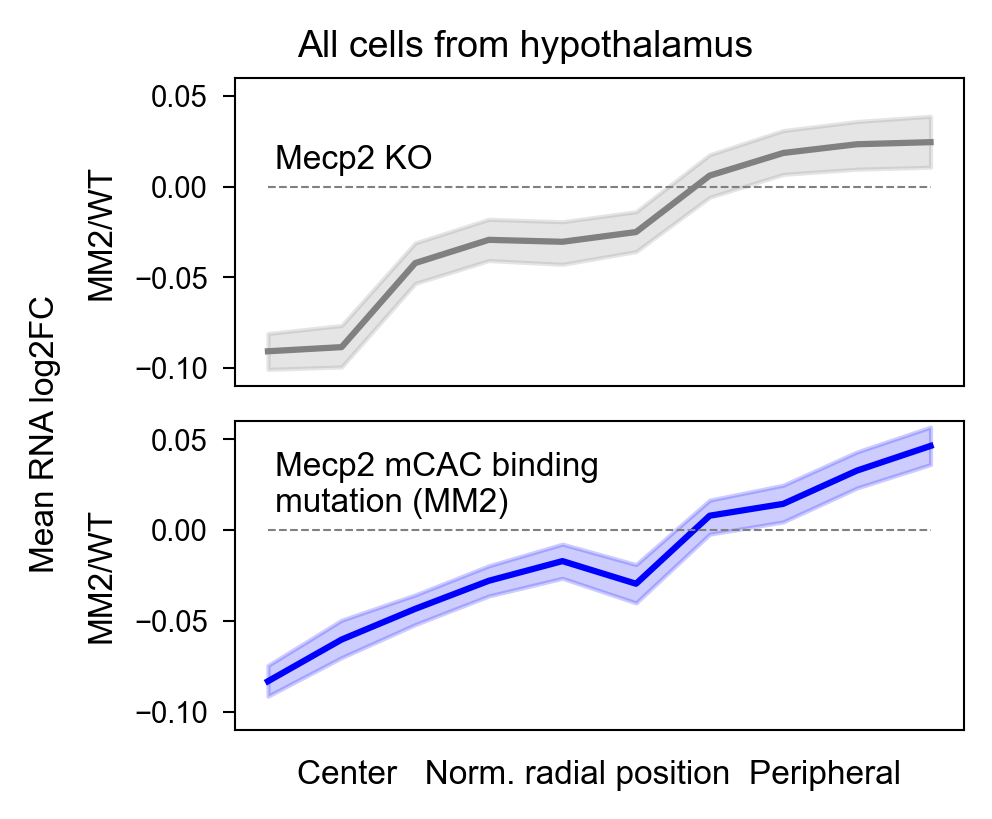

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(3,2.45), dpi=300)


##### KO 
ax1 = fig.add_subplot(211)

sns.lineplot(data=df_ko, x='rp_interval', y='log2FoldChange', ax=ax1, color='gray')

ax1.plot([0,9], [0,0], color='gray', linewidth=0.5, linestyle='--')

ax1.set_xticks([])
ax1.set_xlabel(None)
ax1.set_ylabel('MM2/WT')
ax1.set_yticks([-0.1, -0.05, 0, 0.05])
ax1.set_ylim(-0.11,0.06)
ax1.text(0.1,0.01, 'Mecp2 KO', fontsize=8)

####
ax2 = fig.add_subplot(212)

sns.lineplot(data=df_mm2, x='rp_interval', y='log2FoldChange', ax=ax2, color='blue')

ax2.plot([0,9], [0,0], color='gray', linewidth=0.5, linestyle='--')

ax2.set_xticks([])
ax2.set_xlabel('Center   Norm. radial position  Peripheral')
ax2.set_ylabel('MM2/WT')
ax2.set_yticks([-0.1, -0.05, 0, 0.05])
ax2.set_ylim(-0.11,0.06)
ax2.text(0.1,0.01, 'Mecp2 mCAC binding\nmutation (MM2)', fontsize=8)

fig.supylabel('Mean RNA log2FC', x=-0.05, fontsize=8)
fig.suptitle('All cells from hypothalamus', y=1.05, fontsize=9)

import os
figure_name = os.path.join(figure_folder, 'Tilloston_mCAC_mutation_v2.pdf')
plt.savefig(figure_name)

plt.show()